In [1]:
# main.py

from config import PRO_FILE
from data_loader import load_profile, extract_variables
from utils import compute_hst, identify_accumulation_periods, track_layers,get_number_events, track_all_layers_xr,parse_gtype
from plotting import plot_hst_and_periods, plot_seasonal_sn38
import matplotlib.pyplot as plt

pro = load_profile(PRO_FILE)
vars = extract_variables(pro)

In [13]:
import numpy as np

# Flatten the list of arrays/lists in vars['gt']
gt_flat = np.concatenate([np.atleast_1d(x) for x in vars['gt'] if x is not None])
gt = divmod(gt_flat, 100)[0].astype(int)

#test = -1*np.array(vars['hardness'])

In [14]:
def plot_single_profile(fig,ax, pro, var=None, ax_colorbar=None,ylim=None):
    
    try: hh = [-h if h is not None else None for h in vars['hardness']] #get postive values for hand hardness 
    except: hh= -pro['hardness']
    try: height = pro['ht']
    except: height = pro['layer_top']
    try: graintype = pro['gt']
    except: graintype = pro['graintype']
    
    if len(height) == 0: return
      
    #Define colorcode for grain types
    cgt=['greenyellow','darkgreen','pink','lightblue','blue','magenta','red','cyan','lightblue']#'red','grey']
    gt_flat = np.concatenate([np.atleast_1d(x) for x in graintype if x is not None])
    gt = divmod(gt_flat,100)[0].astype(int)

    ########### contours ##########################
    try: hs = height[-1]
    except: hs = height.max()
    ax.plot([0, 0], [0, hs], c='black', linewidth=1)  #y-axis line
    ax.plot([0, hh[0]], [0, 0], c='black', linewidth=1)  #x-axis line

    ################ Plot profile against hand hardness ########################
    
    ybottom=0
    for iy, y in enumerate(height):

        """
        ######################################################        
        #Plot layer contours - horizontal line top of layer
        if iy == len(height)-1:
            ax.plot([0, hh[iy]], [y, y], c='black', linewidth=0.5)
        else:
            ax.plot([0, np.max([hh[iy], hh[iy + 1]])], [y, y], c='black', linewidth=0.5)        
        #Plot layer contours - vertical line right of layer
        ax.plot([hh[iy], hh[iy]], [ybottom, y], c='black', linewidth=0.5)
        """
        ######################################################
        #Fill layer with color of grain type
        ax.fill_betweenx([ybottom, y], 0, hh[iy], color=cgt[int(gt[iy]) - 1] , alpha=0.9)
        
        #cb = ax.pcolormesh([0, hh[iy]],[ybottom, y],np.ones((2,2))*gt[iy],cmap=cmap,vmin=vmin,vmax=vmax,alpha=0.9)
        ybottom = y
        
    ################ colorbar ########################################################
    if ax_colorbar:
        cmapcolorbar = ['greenyellow', 'darkgreen', 'pink', 'lightblue', 'blue', 'magenta', 'red', 'cyan']
        ticklabels = ['PP', 'DF', 'RG', 'FC', 'DH', 'SH', 'MF', 'IF']
        cmapc = mpl.colors.ListedColormap(cmapcolorbar)
        bounds = np.arange(len(cmapcolorbar) + 1)
        norm = mpl.colors.BoundaryNorm(bounds, cmapc.N)
        ticks = np.arange(len(cmapcolorbar)) +0.5
        cb1 = mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmapc, norm=norm, 
                                        ticks=ticks, 
                                        orientation='vertical')
        cb1.set_ticklabels(ticklabels)
        cb1.minorticks_off()

    ########## Plot SH again, since layers are very thin not alost not visible ########################
    try:
        ish = int(np.where(( gt == 6 ))[0])
        ax.fill_betweenx([height[ish-1],height[ish]] , 0, hh[ish], color='magenta' )
        print('++++++++++++++ SHFOUND  in profile +++++++++')
    except: pass

    ax.set_xlim(0, 5.5)
    ax.set_xticks(np.arange(0, 5.5, 1))
    ax.set_xticklabels(['', 'F ', '4F', '1F', 'P', 'K'])
    ax.set_ylabel('Snow depth [cm]')
    ax.set_xlabel('Hand hardness')
    
    if ylim:
        if hs > ylim: 
            ax.set_ylim(0,hs+20)
        else: 
            ax.set_ylim(0,ylim)
    elif hs < 200: 
        ax.set_ylim(0,200)
    else: 
        ax.set_ylim(0, hs+20)

    ########## Plot Variable as line, seperate x-axis ########################
    if var:
        variable = pro[var]
        ax11 = ax.twiny()
        height_var= np.repeat(np.concatenate((np.array([0]), height)), 2)[1:-1]
        var_repeat = np.repeat(variable, 2)
        c='black'
        label=var
        xlabel=var
        xlim = (np.nanmin(variable),np.nanmax(variable))
        if var == 'temperature':
            c='red'
            label = 'Snow temperature'
            xlabel = 'Snow temperature [$^\circ$C]'
            xlim = (-21,0)
        elif var == 'P_unstable':
            xlabel = 'Probability of being unstable [0-1]'
            xlim = (0,1)
            ax11.plot([0.77,0.77],[ax11.get_ylim()[0],ax11.get_ylim()[1]],color='black',linestyle='--')
        ax11.plot(var_repeat, height_var, c=c, linewidth=1.5, label=label)
        ax11.legend(loc=1)
        ax11.set_xlabel(xlabel)
        ax11.set_xlim(xlim)
        return ax11  

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

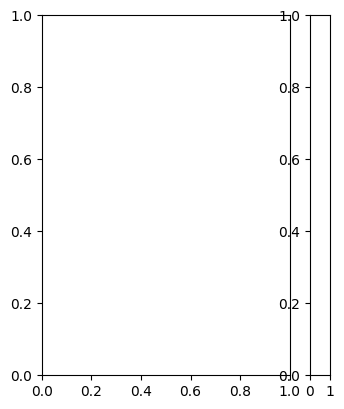

In [15]:


try: plt.cla(); plt.clf(); plt.close()
except: pass
fig=plt.figure(figsize=(4,5))
ax=fig.add_axes([0.18,0.1,0.62,0.72]) # type: ignore
axcolor=fig.add_axes([0.85,0.1,0.05,0.72]) # type: ignore
plot_single_profile(fig, ax, vars)
ax.set_title('title')
#plt.savefig(plot_filepath)